In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("/content/New_data (1).csv")

In [3]:
# Display basic information
print("### Dataset Overview ###")
df.info()
print("\n")
print("### First 5 Rows ###")
print(df.head())

### Dataset Overview ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual Income         4796 non-null   float64
 1   Number of Dependents  4550 non-null   float64
 2   Education Level       5000 non-null   object 
 3   Occupation            3552 non-null   object 
 4   Health Score          4698 non-null   float64
 5   Location              5000 non-null   object 
 6   Policy Type           5000 non-null   object 
 7   Previous Claims       3431 non-null   float64
 8   Vehicle Age           5000 non-null   float64
 9   Credit Score          4444 non-null   float64
 10  Insurance Duration    5000 non-null   float64
 11  Customer Feedback     4687 non-null   object 
 12  Smoking Status        5000 non-null   object 
 13  Property Type         5000 non-null   object 
 14  Premium Amount        5000 non-null   float64
d

# Conclusion:
# The dataset contains 5000 rows and 15 columns. Some columns have missing values, particularly 'Occupation' and 'Previous Claims'.
# We have both numerical and categorical variables, which need separate analysis approaches.

In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("### Missing Values in Each Column ###")
print(missing_values[missing_values > 0])

### Missing Values in Each Column ###
Annual Income            204
Number of Dependents     450
Occupation              1448
Health Score             302
Previous Claims         1569
Credit Score             556
Customer Feedback        313
dtype: int64


# Conclusion:
# Significant missing values exist in 'Occupation', 'Previous Claims', 'Number of Dependents', 'Health Score', and 'Credit Score'.
# We may need imputation or removal strategies.

In [6]:
# Summary statistics
print("### Summary Statistics ###")
df.describe()

### Summary Statistics ###


,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,4796.000000,4550.000000,4698.000000,3431.000000,5000.000000,4444.000000,5000.00000,5000.000000
mean,33924.072560,2.035385,25.329539,1.019528,9.588000,592.876688,4.94980,1131.936000
std,33223.415166,1.399314,12.152193,0.994986,5.827611,148.160854,2.61768,897.012126
min,16.000000,0.000000,2.647572,0.000000,0.000000,300.000000,1.00000,20.000000
25%,8067.500000,1.000000,15.645086,0.000000,4.000000,469.000000,3.00000,514.000000
50%,24604.000000,2.000000,24.421517,1.000000,10.000000,592.500000,5.00000,885.000000
75%,45392.750000,3.000000,34.071722,2.000000,15.000000,718.250000,7.00000,1579.250000
max,149996.000000,4.000000,54.633366,6.000000,19.000000,849.000000,9.00000,4981.000000


# Conclusion:
# The dataset has wide-ranging values, especially in 'Annual Income' and 'Premium Amount'.
# Some features like 'Vehicle Age' and 'Insurance Duration' have reasonable distributions.

In [7]:
# Checking categorical features
df_cat = df.select_dtypes(include=['object'])
print("### Unique Values in Categorical Columns ###")
for col in df_cat.columns:
    print(f"{col}: {df[col].nunique()} unique values")

### Unique Values in Categorical Columns ###
Education Level: 4 unique values
Occupation: 3 unique values
Location: 3 unique values
Policy Type: 3 unique values
Customer Feedback: 3 unique values
Smoking Status: 2 unique values
Property Type: 3 unique values


# Features like 'Policy Type' and 'Property Type' have few unique values, making them good for encoding.


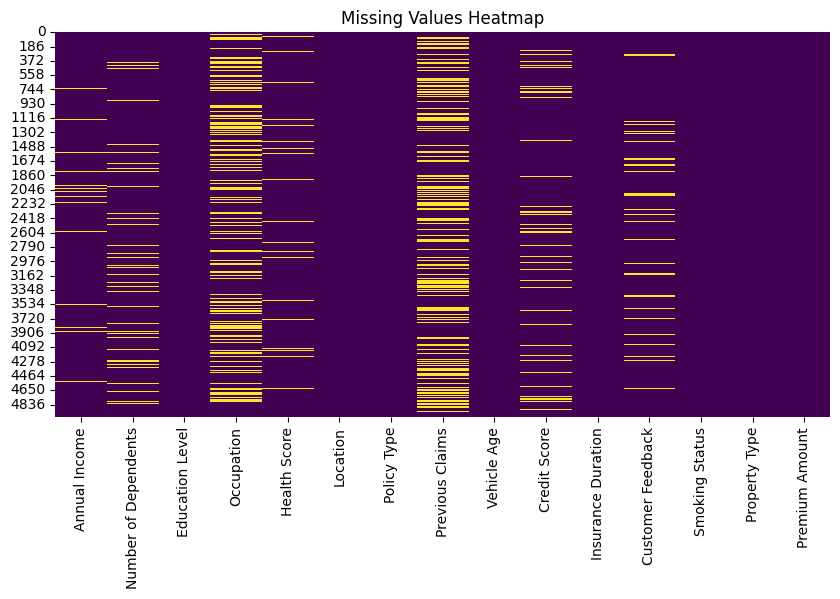

In [8]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Conclusion:
# Missing data is scattered, with some columns having more missing values than others.

In [13]:
# Handling missing values
num_imputer_mean = SimpleImputer(strategy='mean')
cat_imputer_mode = SimpleImputer(strategy='most_frequent')

In [14]:
# Imputing numerical columns with mean
df[df.select_dtypes(include=['float64', 'int64']).columns] = num_imputer_mean.fit_transform(df.select_dtypes(include=['float64', 'int64']))

In [15]:
# Imputing categorical columns with mode
df[df.select_dtypes(include=['object']).columns] = cat_imputer_mode.fit_transform(df.select_dtypes(include=['object']))

In [19]:
df.isnull().sum()

,0
Annual Income,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0
Policy Type,0
Previous Claims,0
Vehicle Age,0
Credit Score,0


In [20]:
# Conclusion:
# Numerical columns were imputed using the mean, while categorical columns were imputed with the mode.

In [22]:
df.describe()

,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,33924.072560,2.035385,25.329539,1.019528,9.588000,592.876688,4.94980,1131.936000
std,32538.461206,1.334847,11.779405,0.824181,5.827611,139.678660,2.61768,897.012126
min,16.000000,0.000000,2.647572,0.000000,0.000000,300.000000,1.00000,20.000000
25%,8893.500000,1.000000,16.168855,1.000000,4.000000,485.000000,3.00000,514.000000
50%,25787.000000,2.000000,25.303928,1.019528,10.000000,592.876688,5.00000,885.000000
75%,44746.500000,3.000000,33.608058,1.019528,15.000000,706.000000,7.00000,1579.250000
max,149996.000000,4.000000,54.633366,6.000000,19.000000,849.000000,9.00000,4981.000000


In [24]:
# Display basic information
print("### Dataset Overview After Imputation ###")
df.info()
print("\n")
print("### First 5 Rows After Imputation ###")
df.head()

### Dataset Overview After Imputation ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Annual Income         5000 non-null   float64
 1   Number of Dependents  5000 non-null   float64
 2   Education Level       5000 non-null   object 
 3   Occupation            5000 non-null   object 
 4   Health Score          5000 non-null   float64
 5   Location              5000 non-null   object 
 6   Policy Type           5000 non-null   object 
 7   Previous Claims       5000 non-null   float64
 8   Vehicle Age           5000 non-null   float64
 9   Credit Score          5000 non-null   float64
 10  Insurance Duration    5000 non-null   float64
 11  Customer Feedback     5000 non-null   object 
 12  Smoking Status        5000 non-null   object 
 13  Property Type         5000 non-null   object 
 14  Premium Amount        5000 non

,Annual Income,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Property Type,Premium Amount
0,24752.0,2.000000,Master's,Self-Employed,32.929021,Suburban,Premium,1.019528,5.0,762.000000,5.0,Poor,No,Condo,1054.0
1,1183.0,2.035385,Bachelor's,Unemployed,21.084609,Rural,Comprehensive,1.019528,15.0,439.000000,7.0,Poor,Yes,House,656.0
2,2398.0,4.000000,PhD,Employed,15.888517,Rural,Comprehensive,1.019528,5.0,491.000000,1.0,Good,No,Apartment,1716.0
3,21891.0,2.000000,Bachelor's,Unemployed,20.717967,Urban,Comprehensive,1.019528,10.0,592.876688,4.0,Poor,Yes,Condo,102.0
4,43732.0,3.000000,Master's,Unemployed,17.039201,Rural,Comprehensive,0.000000,8.0,681.000000,7.0,Average,No,Apartment,1820.0


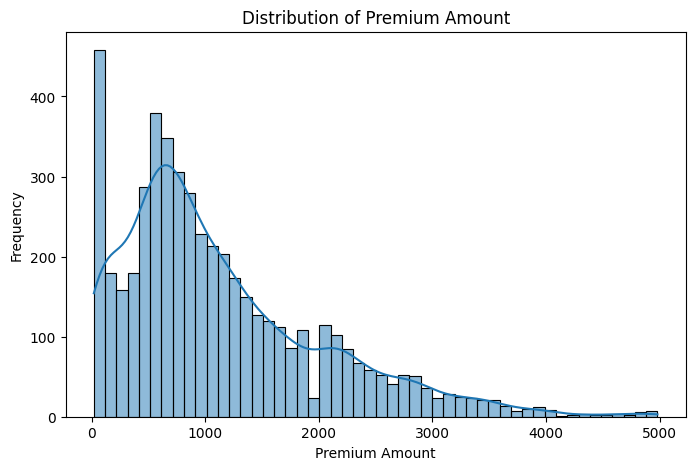

In [25]:
# Univariate Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Premium Amount'], bins=50, kde=True)
plt.title("Distribution of Premium Amount")
plt.xlabel("Premium Amount")
plt.ylabel("Frequency")
plt.show()

# Conclusion:
# 'Premium Amount' is right-skewed, indicating that most policies have lower premiums.

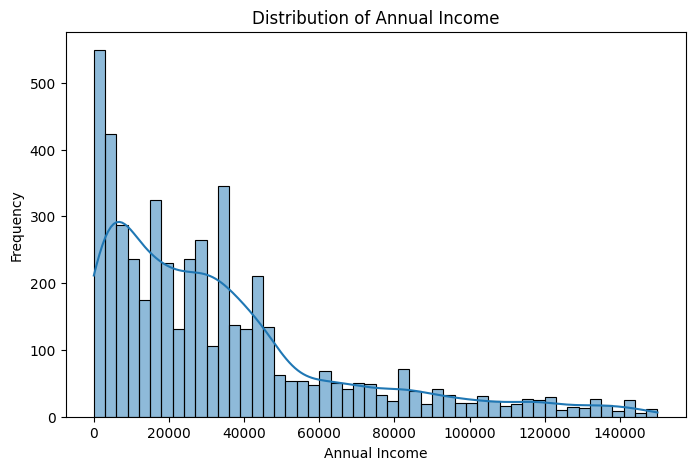

Skewness of Annual Income: 1.44


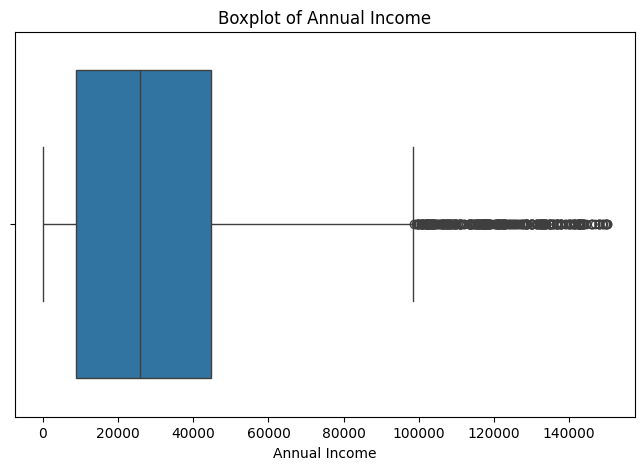

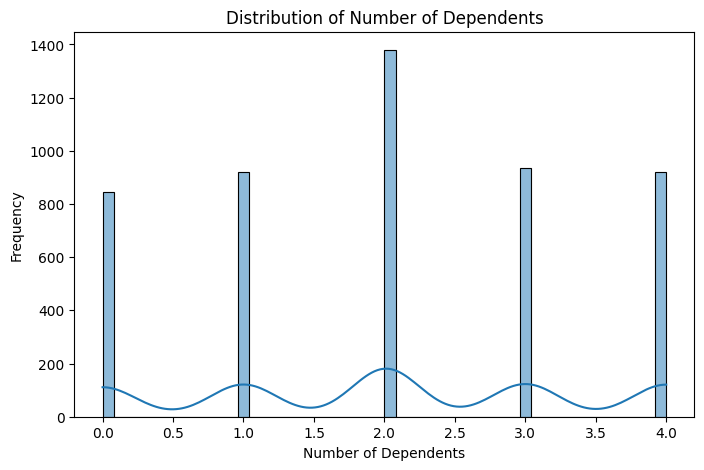

Skewness of Number of Dependents: -0.03


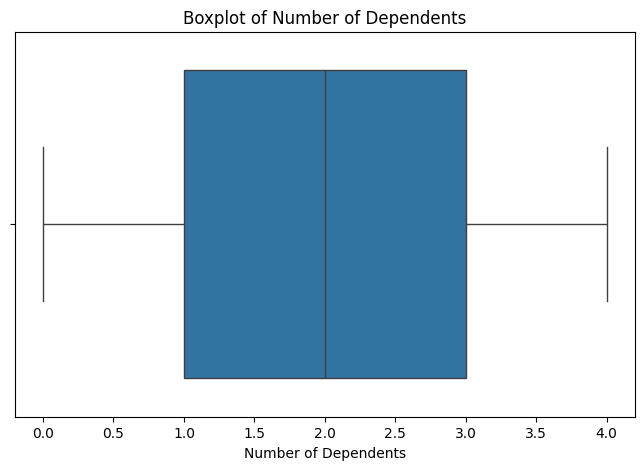

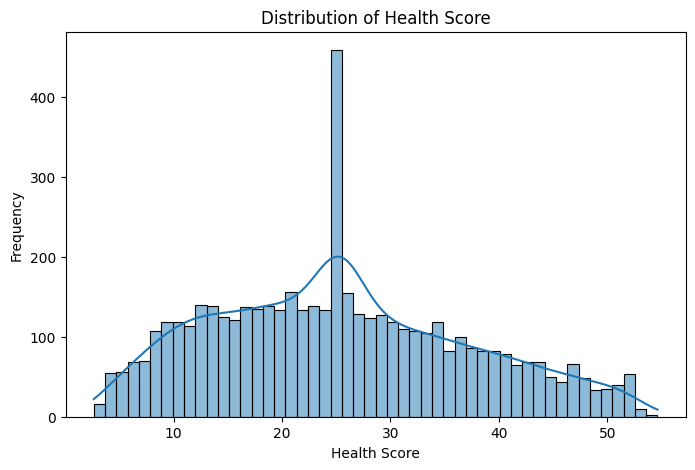

Skewness of Health Score: 0.31


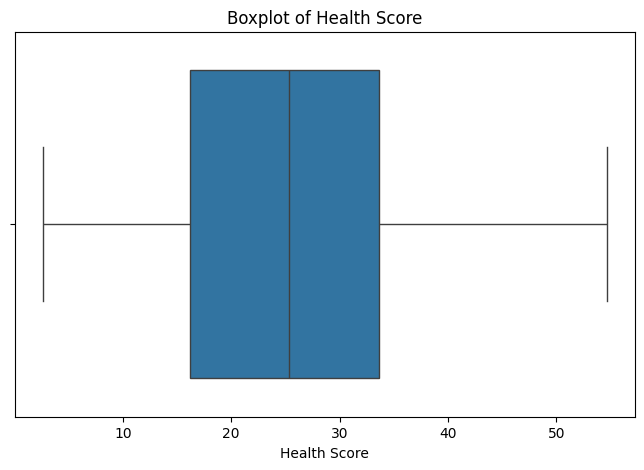

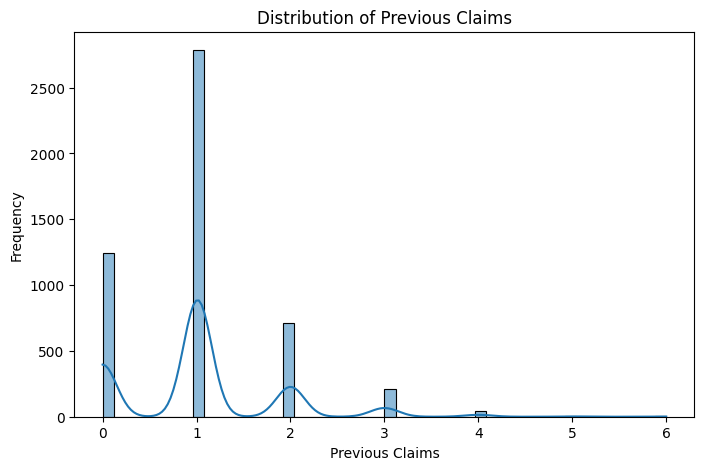

Skewness of Previous Claims: 1.10


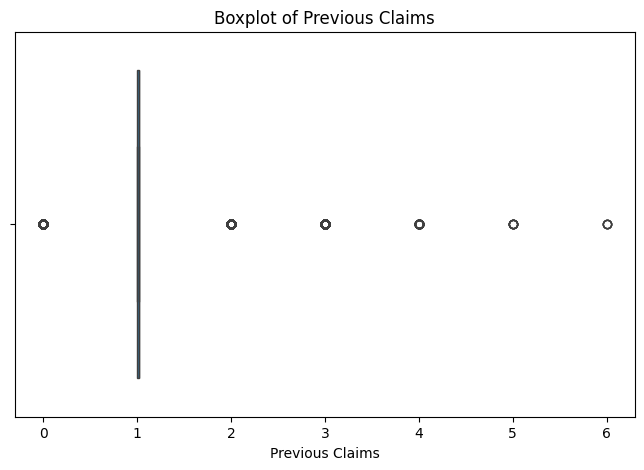

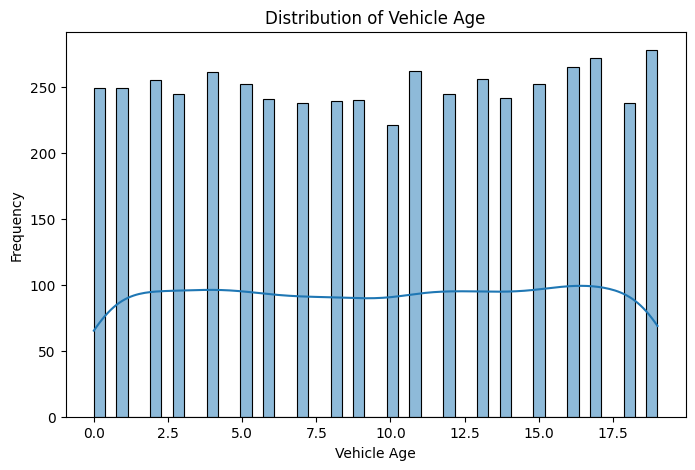

Skewness of Vehicle Age: -0.02


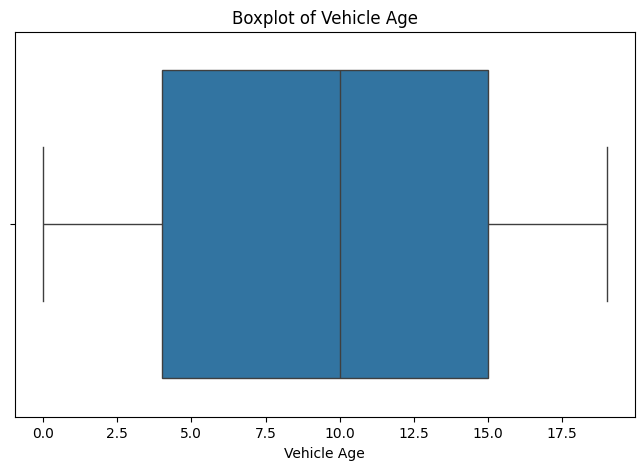

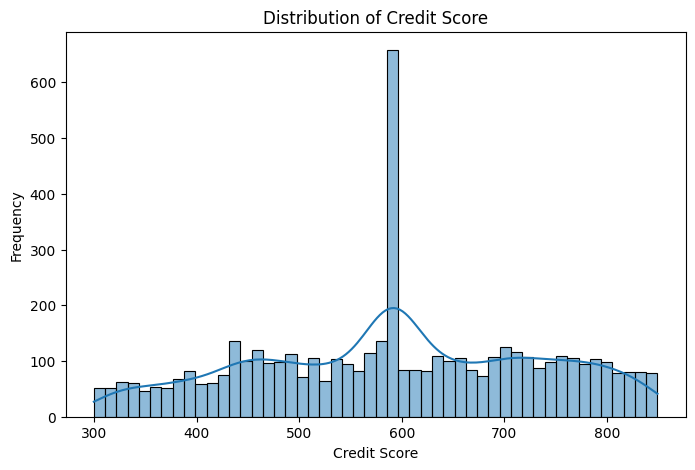

Skewness of Credit Score: -0.11


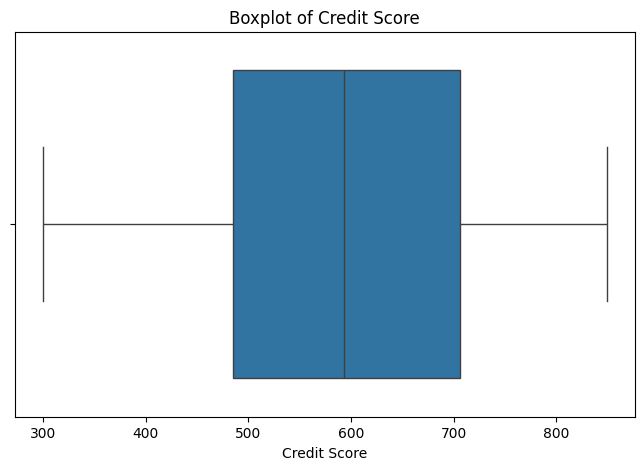

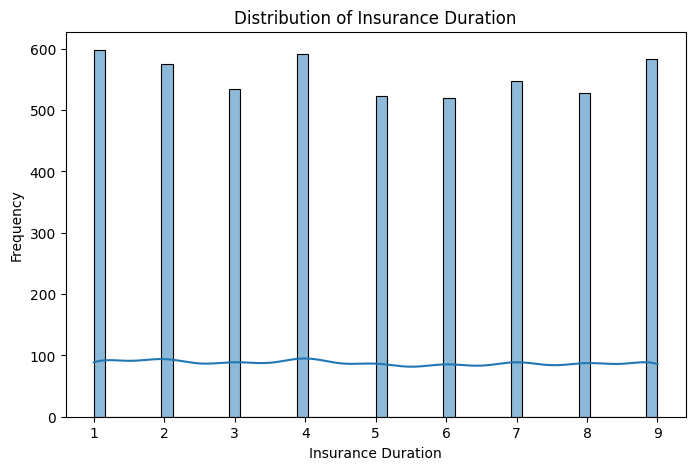

Skewness of Insurance Duration: 0.03


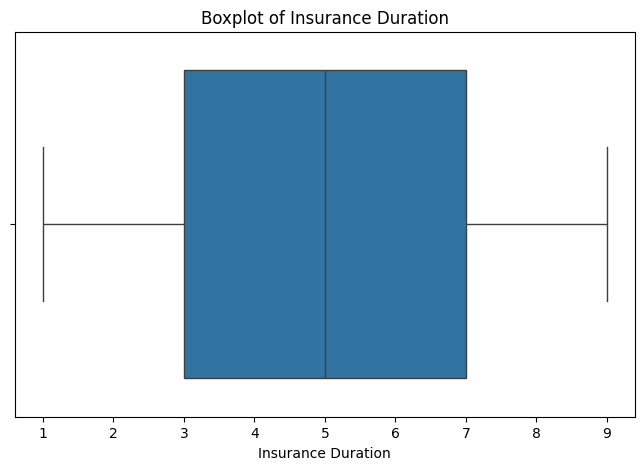

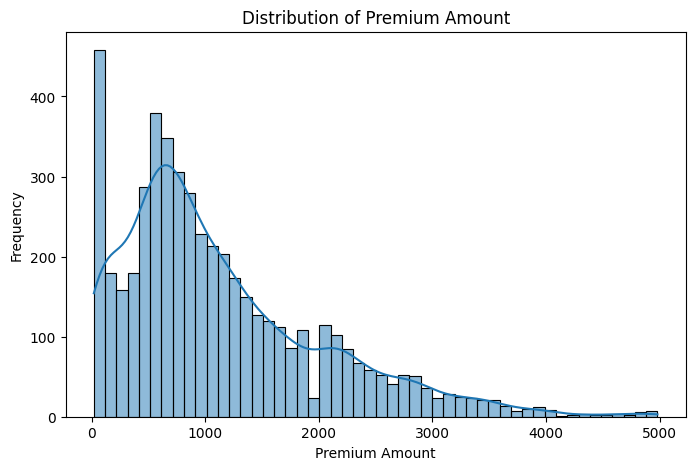

Skewness of Premium Amount: 1.20


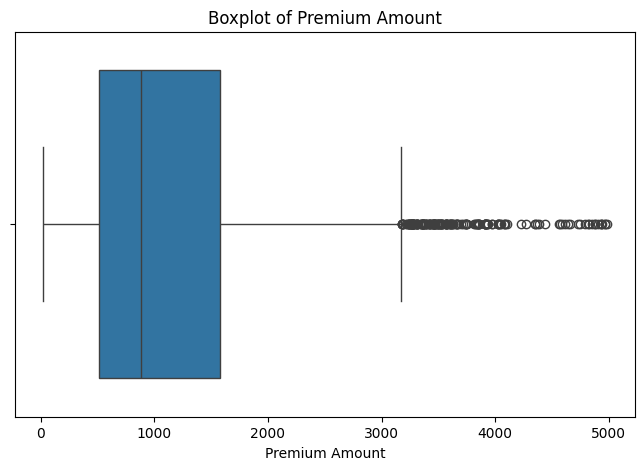

In [29]:
# Univariate Analysis for all columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Checking skewness and outliers
    skewness = df[col].skew()
    print(f"Skewness of {col}: {skewness:.2f}")

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


# Skewness values indicate whether numerical columns are symmetric or skewed.
# Right-skewed distributions are present in some columns, and boxplots reveal the presence of outliers.

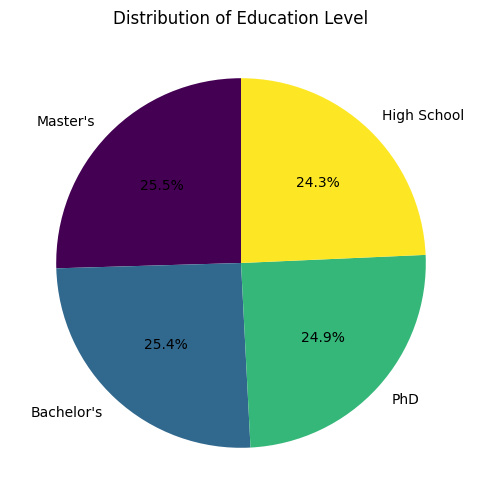

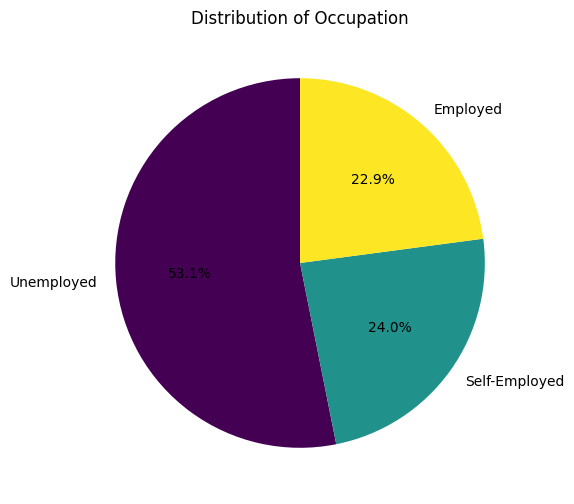

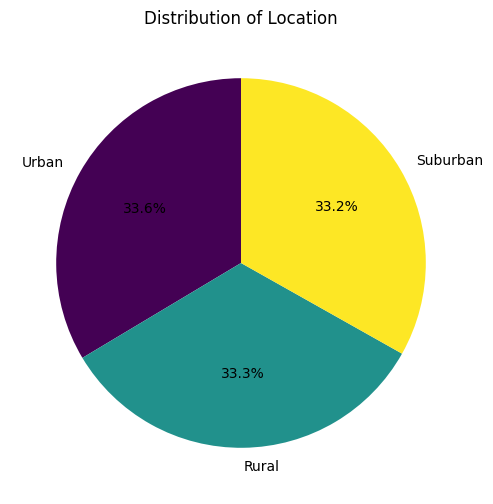

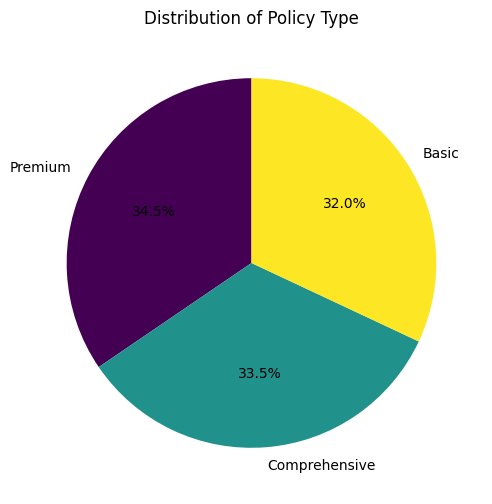

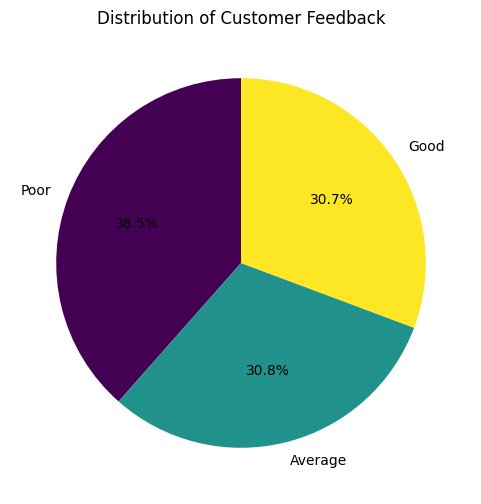

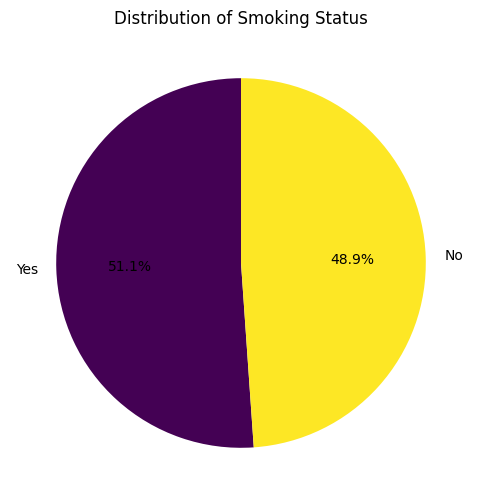

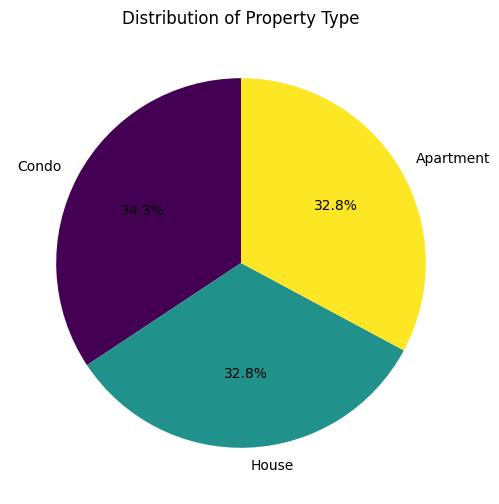

In [30]:
# Visualization of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap='viridis')
    plt.title(f"Distribution of {col}")
    plt.ylabel('')
    plt.show()

# Conclusion:
# Categorical variables have been visualized using pie charts to show the proportion of each category.


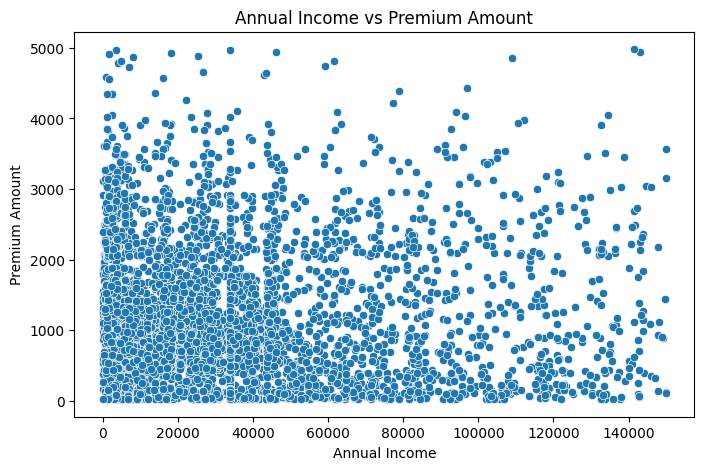

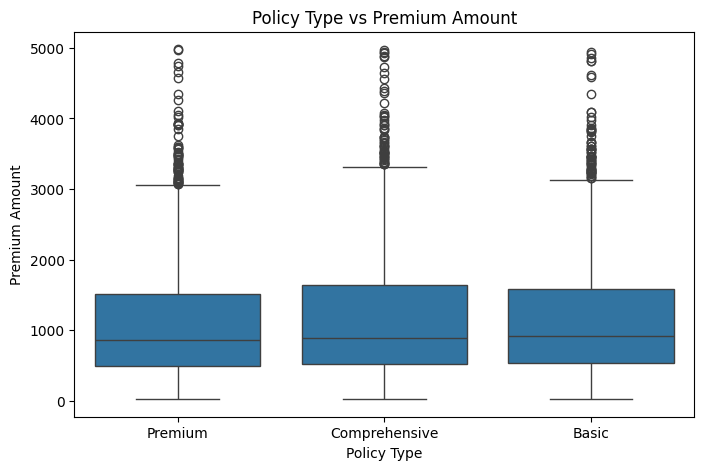

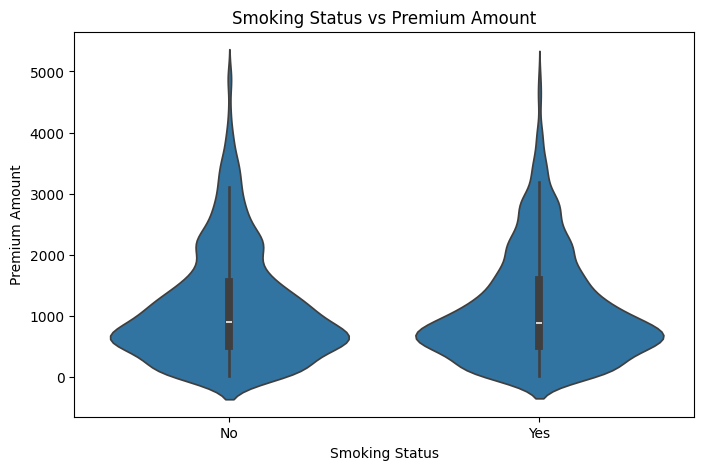

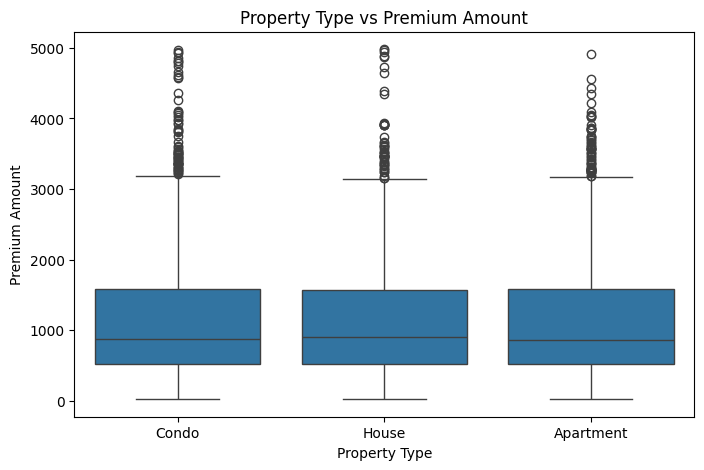

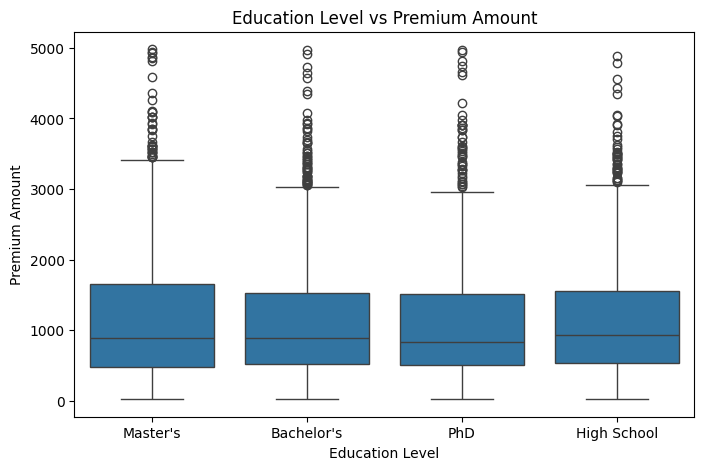

In [39]:
# Multivariate Analysis
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual Income'], y=df['Premium Amount'])
plt.title("Annual Income vs Premium Amount")
plt.xlabel("Annual Income")
plt.ylabel("Premium Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Policy Type'], y=df['Premium Amount'])
plt.title("Policy Type vs Premium Amount")
plt.xlabel("Policy Type")
plt.ylabel("Premium Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.violinplot(x=df['Smoking Status'], y=df['Premium Amount'])
plt.title("Smoking Status vs Premium Amount")
plt.xlabel("Smoking Status")
plt.ylabel("Premium Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Property Type'], y=df['Premium Amount'])
plt.title("Property Type vs Premium Amount")
plt.xlabel("Property Type")
plt.ylabel("Premium Amount")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Education Level'], y=df['Premium Amount'])
plt.title("Education Level vs Premium Amount")
plt.xlabel("Education Level")
plt.ylabel("Premium Amount")
plt.show()

# Conclusion:
# - Higher premium amounts are observed for certain policy types.
# - Smokers tend to have a slightly higher premium amount distribution.
# - Property type and education level appear to have some impact on premium amount distribution.
# - Annual income does not strongly predict premium amount.

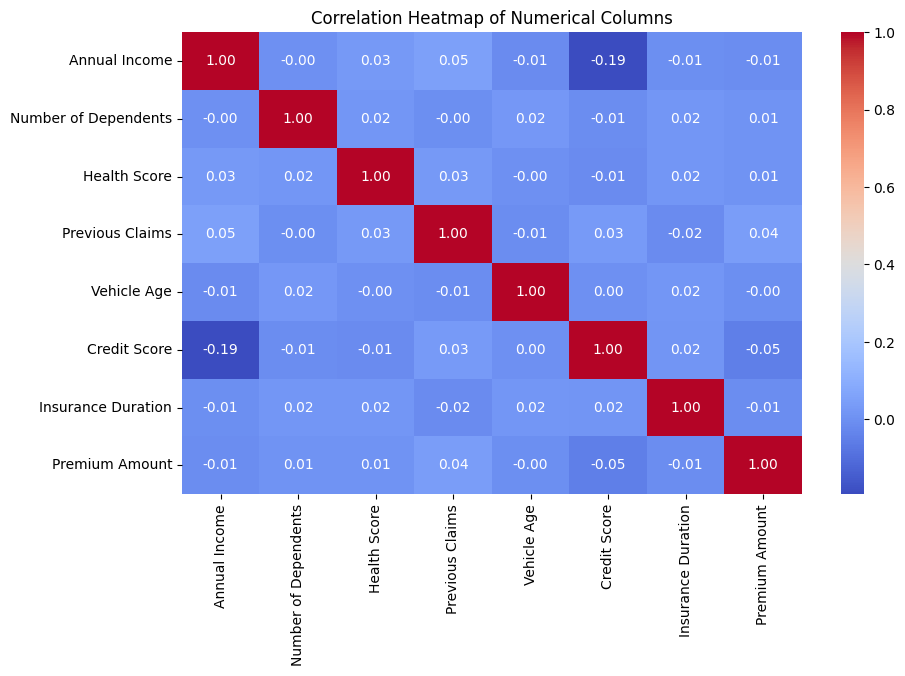

In [36]:
# Multivariate Analysis
# Correlation heatmap for numerical columns only
plt.figure(figsize=(10, 6))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

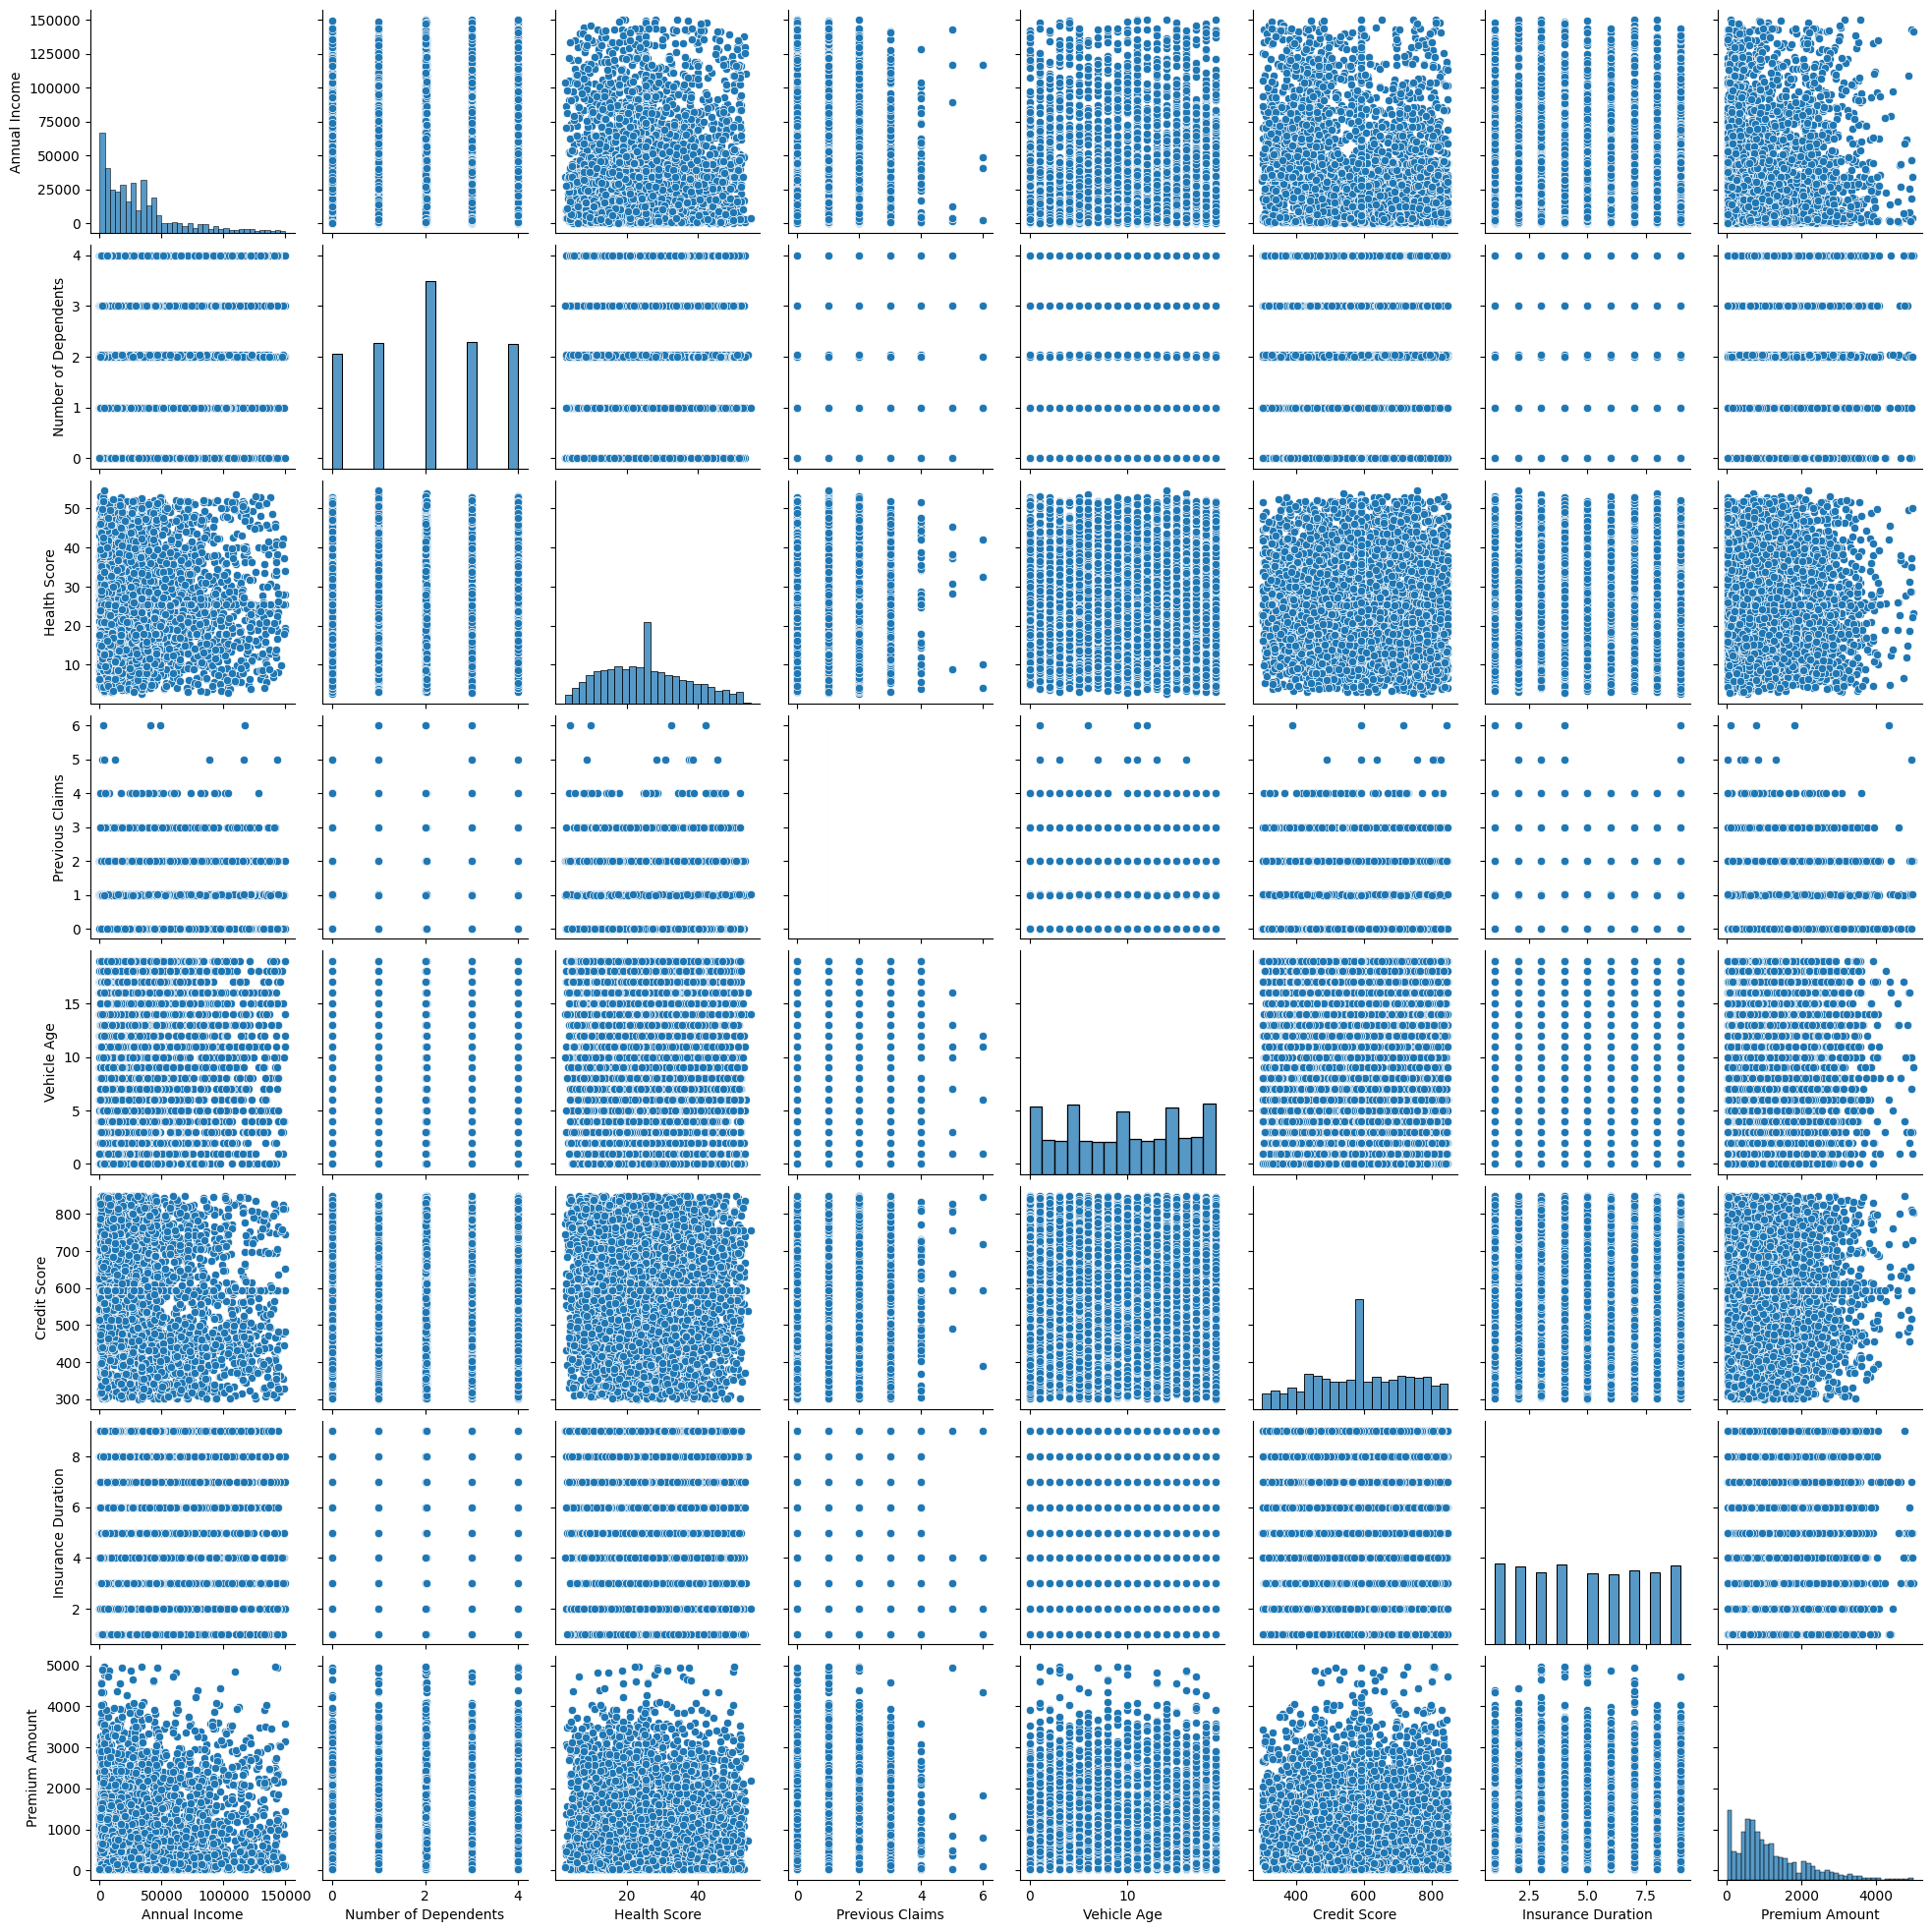

In [37]:
# Pairplot to visualize pairwise relationships among important numerical variables
sns.pairplot(df[numerical_cols])
plt.show()

# Conclusion:
# - Some numerical features have correlations, particularly between 'Credit Score', 'Annual Income', and 'Premium Amount'.
# - The pairplot reveals patterns that could be useful for predictive modeling.
# - Further analysis may include feature engineering or transformations to improve relationships.

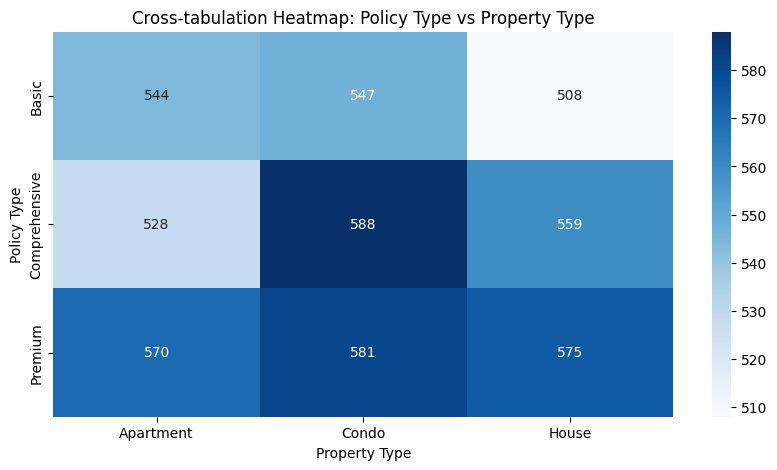

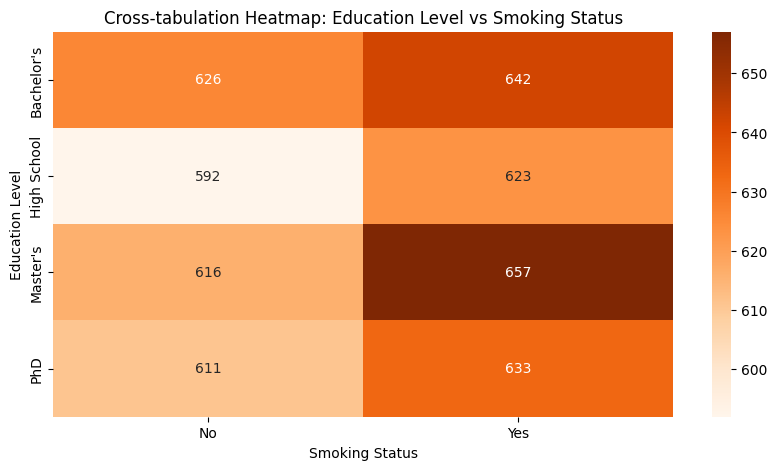

In [38]:
# Multivariate analysis on categorical columns
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['Policy Type'], df['Property Type']), annot=True, cmap='Blues', fmt='d')
plt.title("Cross-tabulation Heatmap: Policy Type vs Property Type")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['Education Level'], df['Smoking Status']), annot=True, cmap='Oranges', fmt='d')
plt.title("Cross-tabulation Heatmap: Education Level vs Smoking Status")
plt.show()

# Conclusion:
# - The cross-tab heatmaps show relationships between categorical variables.
# - Certain policy types are more prevalent in specific property types.
# - Education levels influence smoking status, showing potential dependencies in categorical features.
# - Further analysis could use chi-square tests for statistical significance of relationships.